### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 6
### Due: Saturday, Mar 23rd at 11.59pm CT
---

This problem has to do with density estimation and clustering. 

1. Read in `hw6_data_1.npy`. The dataset should consist of $1000$ samples with $2$ features. Note that the last column are the labels, not another feature. Make a $2$-D scatter plot of the data colored by their labels. 


2. Start with kernel density estimation on the data set. First, perform a grid search $5$-fold cross-validation to find the best bandwidth, testing $30$ bandwidths between $0.1$ and $1.0$. What is this best bandwidth? Using this best bandwidth, plot the two-dimensional kernel density estimate of the distribution. 


3. Now try a nearest neighbors approach to estimating the density. Use the Bayesian nearest neighbors option. Plot the estimated distribution. What value of $k$ neighbors do you need to make the plot look similar to your KDE distribution?


4. Now fit a Gaussian mixture model. Compute the AIC and BIC for the number of GMM components between $1$ and $10$. Plot these AIC and BIC values as a function of number of components. What is the optimal number according to the BIC? Fit the data set with this optimal number of GMM components, and create a new plot that shows the data set, the GMM component mean locations, and the $2$-sigma GMM component ellipses. *(Use the code below to help with plotting the ellipses.)*

In [41]:
# Kludge to fix the bug with draw_ellipse in astroML
from matplotlib.patches import Ellipse

def draw_ellipse(mu, C, ax=None, **kwargs):
    scales=[1, 2, 3] #I moved this here because I didn't want to have to have it as an argument to pass to the function. 
    #Wasn't really necessary, though was a change I made. 
    if ax is None:
        ax = plt.gca()

    # find principal components and rotation angle of ellipse
    sigma_x2 = C[0, 0]
    sigma_y2 = C[1, 1]
    sigma_xy = C[0, 1]

    alpha = 0.5 * np.arctan2(2 * sigma_xy,
                          (sigma_x2 - sigma_y2))
    tmp1 = 0.5 * (sigma_x2 + sigma_y2)
    tmp2 = np.sqrt(0.25 * (sigma_x2 - sigma_y2) ** 2 + sigma_xy ** 2)

    sigma1 = np.sqrt(tmp1 + tmp2)
    sigma2 = np.sqrt(tmp1 - tmp2)

    for scale in scales:
        ax.add_patch(Ellipse(xy=(mu[0], mu[1]),
                          width=2 * scale * sigma1, height=2 * scale * sigma2,
                          angle=alpha * 180. / np.pi,
                          **kwargs, fill="False", alpha=0.2)) #Modified to give semi-transparent ellipses so you can read the plot better  

5. Now try Kmeans clustering with $5$ clusters. 
    - Use the `StandardScalar` to scale the data.
    - Fit the Kmeans model.
    - Find the cluster centers, and then inverse transform thse cluster centers back to the original unscaled coordinates.
    - Predict the labels for the scaled data.
    - Finally, make a two-panel side by side plot showing (a) the original data colored by its labels, then (b) the data colored by the Kmeans predicted labels, with cluster centers superposed.

### Solution

[[-8.46474567 -3.45517123  1.        ]
 [-9.93233853 -2.31955228  1.        ]
 [-9.30833095 -1.9725388   1.        ]
 ...
 [-3.42236789  1.69166315  2.        ]
 [-3.31992823 -6.1090681   3.        ]
 [-3.62495834  0.11710104  2.        ]]
Max Label: 
4.0
Min Label: 
0.0


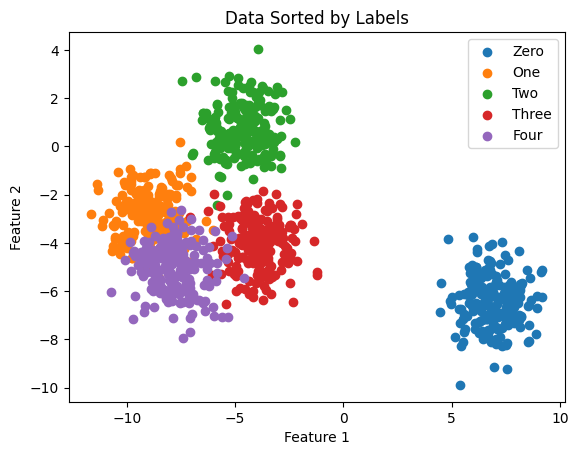

In [42]:
import os
import numpy as np
from matplotlib import pyplot as plt

os.chdir('/home/hoelsczj/repos/astr_8070_S24/coursework/homeworks/hw_data/')
HWData=np.load('hw6_data_1.npy')

print(HWData)

#Putting the labels into an array and printing the max and min values 
labels=HWData[:,2]
print("Max Label: ")
print(np.max(labels))
print("Min Label: ")
print(np.min(labels))

#Putting the indices for where each type of label appears into vectors 
ZerosIndices=np.where(labels==0.)
OnesIndices=np.where(labels==1.)
TwosIndices=np.where(labels==2.) #Vectorizing this 
ThreesIndices=np.where(labels==3.)
FoursIndices=np.where(labels==4.)

#Pulling out all rows with each type of label 
ZerosData=HWData[ZerosIndices, :]
OnesData=HWData[OnesIndices, :]
TwosData=HWData[TwosIndices, :]
ThreesData=HWData[ThreesIndices, :]
FoursData=HWData[FoursIndices, :]

#Scatter plotting data sorted by label, each with different colors and a legend on the plot 
plt.scatter(ZerosData[0,:, 0], ZerosData[0,:, 1], label="Zero") 
plt.scatter(OnesData[0,:, 0], OnesData[0,:, 1], label="One") 
plt.scatter(TwosData[0,:, 0], TwosData[0,:, 1], label="Two") 
plt.scatter(ThreesData[0,:, 0], ThreesData[0,:, 1], label="Three") 
plt.scatter(FoursData[0,:, 0], FoursData[0,:, 1], label="Four") 
plt.title("Data Sorted by Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [43]:
# Determining the optimum bandwidth 
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

bandwidthrange = np.linspace(0.1, 1, 30) # Try out 30 bandwidths between 0.1 to 1.0
KValue = 5 # Apply five - fold cross validation
grid = GridSearchCV(KernelDensity(), {'bandwidth': bandwidthrange}, cv=KValue) # Try each bandwidth with K-folds
grid.fit(HWData[:,[0,1]]) #Apply to our data
optimum = grid.best_params_['bandwidth'] #finding the optimum bandwidth 
print("Optimum Bandwidth: ")
print(optimum) #printing the optimum bandwidth 

Optimum Bandwidth: 
0.4724137931034482


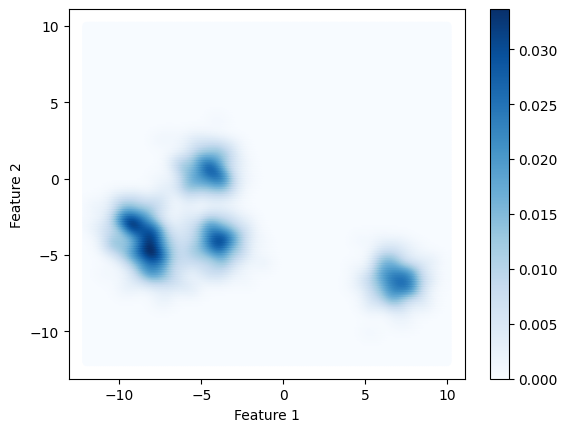

In [44]:
from sklearn.neighbors import KernelDensity

kdensityestimate = KernelDensity(kernel='gaussian', bandwidth=optimum)
kdensityestimate.fit(HWData[:,[0,1]]) #doing kde fit with optimum bandwidth 

alpha = beta = np.linspace(-12,10,200) #setting up grid of points to evaluate at 
Grid = np.vstack(list(map(np.ravel, np.meshgrid(alpha, beta)))).T
density = np.exp(kdensityestimate.score_samples(Grid)) #Evaluate on the grid 

plt.scatter(Grid[:,0], Grid[:,1], c=density, cmap="Blues", edgecolor="None") #making density plot 
plt.ylabel('Feature 2')
plt.xlabel('Feature 1')
plt.colorbar()

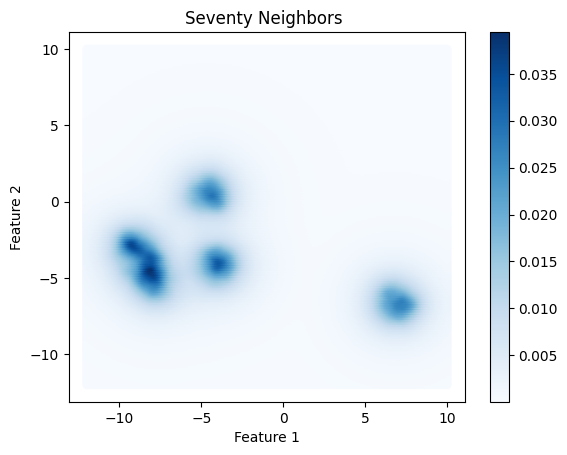

<Figure size 640x480 with 0 Axes>

In [45]:
from astroML.density_estimation import KNeighborsDensity
from sklearn.neighbors import KernelDensity

k = 70 #Number of neighbors, chosen by trial and error until it looked like plot above 
Data = HWData[:,[0,1]] #Loading data 

# Determine the density using Bayesian nearest neighbors
neighbors = KNeighborsDensity('bayesian', n_neighbors=k)
neighbors.fit(Data) #do the fit 
alpha = beta = np.linspace(-12,10,200) #set up grid to use in making plot 
Grid = np.vstack(list(map(np.ravel, np.meshgrid(alpha, beta)))).T
density_neighbors = neighbors.eval(Grid) / len(Data)

plt.scatter(Grid[:,0], Grid[:,1], c=density_neighbors, cmap="Blues", edgecolor="None") #plot this 
plt.colorbar()
# put some labels on it 
plt.ylabel('Feature 2')
plt.xlabel('Feature 1')
plt.title("Seventy Neighbors ")
plt.show()
plt.clf()

I tried various values of k between 10 and a few hundred. I settled on 70 as producing something that visually resembles my kde plot. 

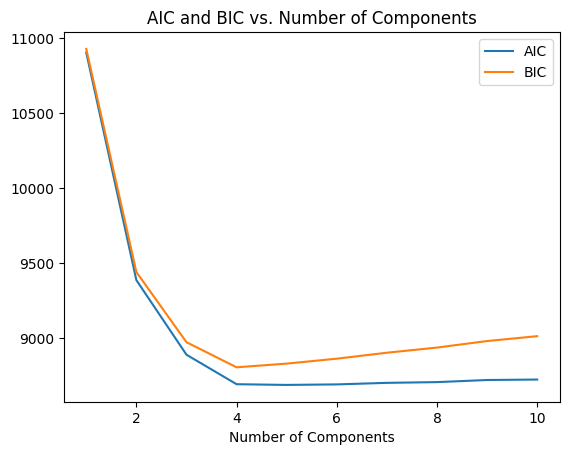

In [46]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn import preprocessing

import numpy as np
np.bool = np.bool_ #patching issue caused by numpy update conflicting with these packages 
Data = HWData[:,[0,1]] #Loading data 

#Use 1 to 10 components
Number_Components = np.arange(1, 11)
BIC_values=[] #initialize empty lists 
AIC_values=[]

for N in Number_Components: #Gaussian mixture fit for each number of components 
    model=GaussianMixture(N).fit(Data)
    BIC_values.append(model.bic(Data)) #calculating aic and bic values, loading into lists 
    AIC_values.append(model.aic(Data))

plt.plot(Number_Components, AIC_values, label="AIC") #plotting aic and bic vs number of components 
plt.plot(Number_Components, BIC_values, label="BIC")
plt.xlabel("Number of Components")
plt.title("AIC and BIC vs. Number of Components")
plt.legend()
plt.show()

The preferreed number of components is 4, as that is where the BIC is minimized. 

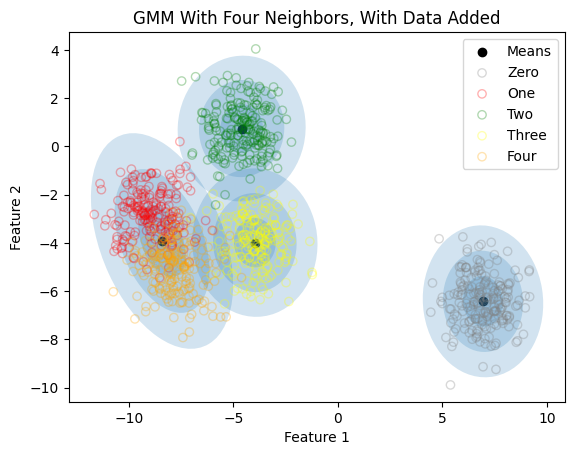

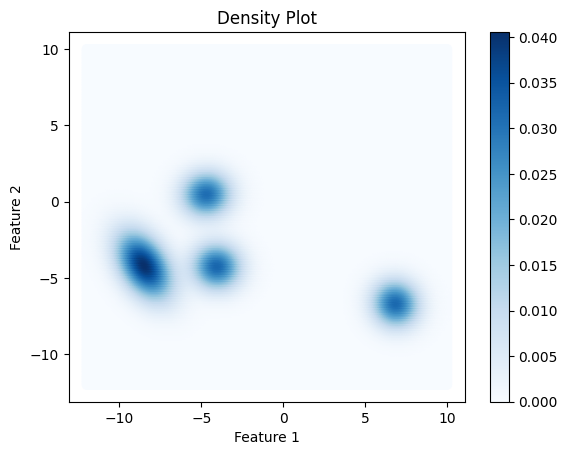

In [47]:
Data = HWData[:,[0,1]] #Loading data 
N=4 #four components (the optimum from the plot above)
model=GaussianMixture(N).fit(Data) #doing fit 

alpha = beta = np.linspace(-12,10,200) #set up grid to use in making plot 
Grid = np.vstack(list(map(np.ravel, np.meshgrid(alpha, beta)))).T
logprob = model.score_samples(Grid)
pdf = np.exp(logprob) #calculating the probability density function 

plt.scatter(model.means_[:,0], model.means_[:,1], color='black', label='Means') #plot means 
for element in range(0,4):
    draw_ellipse(model.means_[element,:], model.covariances_[element,:]) #draw ellipses 
plt.title("GMM With Four Neighbors, With Data Added")

#I made the data transparent so you can see the plot underneath
#Plotting the data with labels 
plt.scatter(ZerosData[0,:, 0], ZerosData[0,:, 1], label="Zero", facecolors='none', edgecolors='gray', alpha=0.3) 
plt.scatter(OnesData[0,:, 0], OnesData[0,:, 1], label="One", facecolors='none', edgecolors='red', alpha=0.3) 
plt.scatter(TwosData[0,:, 0], TwosData[0,:, 1], label="Two", facecolors='none', edgecolors='green',alpha=0.3) 
plt.scatter(ThreesData[0,:, 0], ThreesData[0,:, 1], label="Three", facecolors='none', edgecolors='yellow',alpha=0.3) 
plt.scatter(FoursData[0,:, 0], FoursData[0,:, 1], label="Four", facecolors='none', edgecolors='orange',alpha=0.3) 
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
plt.clf()

#Plotting the density plot separately as I think it's nice to see. Not part of the problem, though. 
plt.title("Density Plot")
plt.scatter(Grid[:, 0], Grid[:, 1], c=pdf, cmap='Blues')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar()
plt.show()


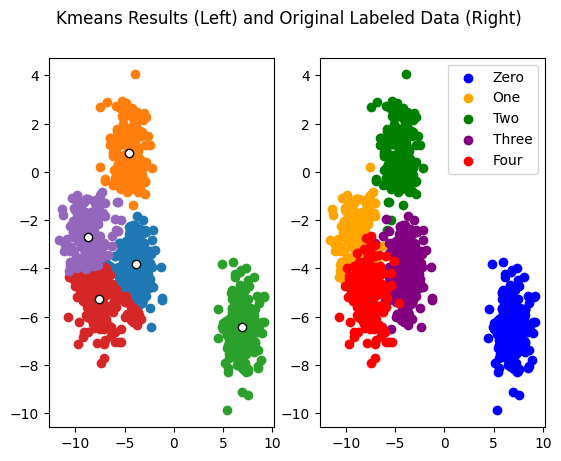

In [65]:
figure, (ax1, ax2) = plt.subplots(1, 2) #setting up two side by side plots 
figure.suptitle('Kmeans Results (Left) and Original Labeled Data (Right)')

#KMeans clustering
number_clusters = 5 #setting up with 5 clusters 
scaler = preprocessing.StandardScaler()
Kmeansresults = KMeans(n_clusters=number_clusters) #kmeans run 
Kmeansresults.fit(scaler.fit_transform(Data)) #scalar transform 
Kmeans_Labels = Kmeansresults.predict(scaler.fit_transform(Data)) #labels for each of the points

clf = KMeans(n_clusters=2) #Try 2 clusters to start with
clf.fit(Data)
centers = clf.cluster_centers_ #location of the clusters
labels = clf.predict(Data) #labels for each of the points

# plot the data color-coded by cluster id
colors = ['C0', 'C1', 'C2', 'C3', 'C4']
for index in range(0,5):
    ax1.scatter(Data[Kmeans_Labels==index,0], Data[Kmeans_Labels==index,1], color=colors[index]) #make scatter plot for each cluster
    
# plot cluster centers
cluster_centers = scaler.inverse_transform(Kmeansresults.cluster_centers_) #do the inverse transform before plotting centers 
ax1.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='w', edgecolors='k')

#Plotting original data 
ax2.scatter(ZerosData[0,:, 0], ZerosData[0,:, 1], label="Zero", color='blue') 
ax2.scatter(OnesData[0,:, 0], OnesData[0,:, 1], label="One", color='orange') 
ax2.scatter(TwosData[0,:, 0], TwosData[0,:, 1], label="Two", color='green') 
ax2.scatter(ThreesData[0,:, 0], ThreesData[0,:, 1], label="Three", color='purple') 
ax2.scatter(FoursData[0,:, 0], FoursData[0,:, 1], label="Four", color='red') 
ax2.legend() #adding legend to the plot 

